# Scraping Data 

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/"
pages = 25
page_size = 100

reviews = []
stars = []
date = []
country = []


#Performing loop function to creaate url for all pages
for i in range(1, pages + 1):

    print(f"Scraping page {i}")
    
     # Create URL to collect links
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)
    
    # Parse content
    content = response.content
    
    soup = BeautifulSoup(response.content,"html.parser")
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
        
    for item in soup.find_all("div", class_="rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    for item in soup.find_all("time"):
        date.append(item.text)
        
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip("()"))

   

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25


In [3]:
#check length to fit the data
len(reviews)

2500

In [4]:
len(country) , len(stars) , len(date)

(2500, 2525, 2500)

In [5]:
#fiting 
stars = stars[:2500]

In [6]:
df = pd.DataFrame({"Review":reviews, "Stars":stars, "Date": date, "Country":country})
df.head()

,Review,Stars,Date,Country
0,✅ Trip Verified | Although transferring to thi...,\n\t\t\t\t\t\t\t\t\t\t\t\t5,15th May 2025,(United States)
1,✅ Trip Verified | We are extremely grateful ...,8,8th May 2025,(Switzerland)
2,✅ Trip Verified | I had an appalling experie...,10,29th April 2025,(South Africa)
3,"Not Verified | Good points, the cabin crew, t...",3,22nd April 2025,(United Kingdom)
4,"Not Verified | It was a decent flight, reason...",6,22nd April 2025,(United Kingdom)


In [7]:
df.shape

(2500, 4)

In [8]:
df.to_csv("C:/Users/ASUS/Downloads/Skills/Data Science/British Airways DS Project/BA_reviews.csv")

# Analyse data

In [36]:
dataset = pd.read_csv("BA_reviews.csv")
dataset.drop(columns='Unnamed: 0',inplace=True)
dataset

,Review,Stars,Date,Country
0,✅ Trip Verified | Although transferring to thi...,5,15th May 2025,(United States)
1,✅ Trip Verified | We are extremely grateful ...,8,8th May 2025,(Switzerland)
2,✅ Trip Verified | I had an appalling experie...,10,29th April 2025,(South Africa)
3,"Not Verified | Good points, the cabin crew, t...",3,22nd April 2025,(United Kingdom)
4,"Not Verified | It was a decent flight, reason...",6,22nd April 2025,(United Kingdom)
...,...,...,...,...
2495,London City to Isle of Man on BA Cityflyer ope...,10,23rd May 2016,(United Kingdom)
2496,✅ Verified Review | Amsterdam to Sao Paulo vi...,8,21st May 2016,(Netherlands)
2497,✅ Verified Review | London City to Glasgow wi...,8,20th May 2016,(United Kingdom)
2498,✅ Verified Review | My partner and I were fly...,2,20th May 2016,(United Kingdom)


In [37]:
dataset["Verifed"]=dataset.Review.str.contains("Trip Verified")
dataset

,Review,Stars,Date,Country,Verifed
0,✅ Trip Verified | Although transferring to thi...,5,15th May 2025,(United States),True
1,✅ Trip Verified | We are extremely grateful ...,8,8th May 2025,(Switzerland),True
2,✅ Trip Verified | I had an appalling experie...,10,29th April 2025,(South Africa),True
3,"Not Verified | Good points, the cabin crew, t...",3,22nd April 2025,(United Kingdom),False
4,"Not Verified | It was a decent flight, reason...",6,22nd April 2025,(United Kingdom),False
...,...,...,...,...,...
2495,London City to Isle of Man on BA Cityflyer ope...,10,23rd May 2016,(United Kingdom),False
2496,✅ Verified Review | Amsterdam to Sao Paulo vi...,8,21st May 2016,(Netherlands),False
2497,✅ Verified Review | London City to Glasgow wi...,8,20th May 2016,(United Kingdom),False
2498,✅ Verified Review | My partner and I were fly...,2,20th May 2016,(United Kingdom),False


In [64]:
dataset["Review1"]=dataset["Review"].str.strip("✅ Trip Verified |").str.strip("Not Verified |").str.strip("Review |")
dataset

,Review,Stars,Date,Country,Verifed,Review1
0,✅ Trip Verified | Although transferring to thi...,5,15th May 2025,(United States),True,Although transferring to this flight through H...
1,✅ Trip Verified | We are extremely grateful ...,8,8th May 2025,(Switzerland),True,We are extremely grateful to the crew of fl...
2,✅ Trip Verified | I had an appalling experie...,10,29th April 2025,(South Africa),True,I had an appalling experience with British Air...
3,"Not Verified | Good points, the cabin crew, t...",3,22nd April 2025,(United Kingdom),False,"Good points, the cabin crew, they were helpful..."
4,"Not Verified | It was a decent flight, reason...",6,22nd April 2025,(United Kingdom),False,"It was a decent flight, reasonable comfortable..."
...,...,...,...,...,...,...
2495,London City to Isle of Man on BA Cityflyer ope...,10,23rd May 2016,(United Kingdom),False,London City to Isle of Man on BA Cityflyer ope...
2496,✅ Verified Review | Amsterdam to Sao Paulo vi...,8,21st May 2016,(Netherlands),False,Amsterdam to Sao Paulo via London Heathrow wit...
2497,✅ Verified Review | London City to Glasgow wi...,8,20th May 2016,(United Kingdom),False,London City to Glasgow with British Airways. O...
2498,✅ Verified Review | My partner and I were fly...,2,20th May 2016,(United Kingdom),False,My partner and I were flying from London Heath...


In [76]:
dataset.dtypes

Review     object
Stars       int64
Date       object
Country    object
Verifed      bool
Review1    object
dtype: object

In [100]:
dataset.Date=pd.to_datetime(dataset.Date,format='mixed')
dataset

,Review,Stars,Date,Country,Verifed,Review1
0,✅ Trip Verified | Although transferring to thi...,5,2025-05-15,(United States),True,Although transferring to this flight through H...
1,✅ Trip Verified | We are extremely grateful ...,8,2025-05-08,(Switzerland),True,We are extremely grateful to the crew of fl...
2,✅ Trip Verified | I had an appalling experie...,10,2025-04-29,(South Africa),True,I had an appalling experience with British Air...
3,"Not Verified | Good points, the cabin crew, t...",3,2025-04-22,(United Kingdom),False,"Good points, the cabin crew, they were helpful..."
4,"Not Verified | It was a decent flight, reason...",6,2025-04-22,(United Kingdom),False,"It was a decent flight, reasonable comfortable..."
...,...,...,...,...,...,...
2495,London City to Isle of Man on BA Cityflyer ope...,10,2016-05-23,(United Kingdom),False,London City to Isle of Man on BA Cityflyer ope...
2496,✅ Verified Review | Amsterdam to Sao Paulo vi...,8,2016-05-21,(Netherlands),False,Amsterdam to Sao Paulo via London Heathrow wit...
2497,✅ Verified Review | London City to Glasgow wi...,8,2016-05-20,(United Kingdom),False,London City to Glasgow with British Airways. O...
2498,✅ Verified Review | My partner and I were fly...,2,2016-05-20,(United Kingdom),False,My partner and I were flying from London Heath...


In [ ]:
Reviews_ = dataset.drop_duplicates(subset=['Country']).groupby('Country').agg({"Stars": "mean"})
top_rated = subset.sort_values(by=["Stars"],ascending=False)[:10]
worst_rated = subset.sort_values(by=["Stars"])[:10]

In [104]:
 
dataset.Stars.value_counts()

Stars
1     758
2     318
3     283
8     203
10    177
9     165
5     164
4     163
7     159
6     110
Name: count, dtype: int64

In [106]:
dataset.isnull().sum()

Review     0
Stars      0
Date       0
Country    0
Verifed    0
Review1    0
dtype: int64

In [108]:
dataset.shape

(2500, 6)

In [144]:
subset = dataset.drop_duplicates(subset=['Country']).groupby('Country').agg({"Stars": "mean"})
top_rated = subset.sort_values(by=["Stars"],ascending=False)[:10]
worst_rated = subset.sort_values(by=["Stars"])[:10]



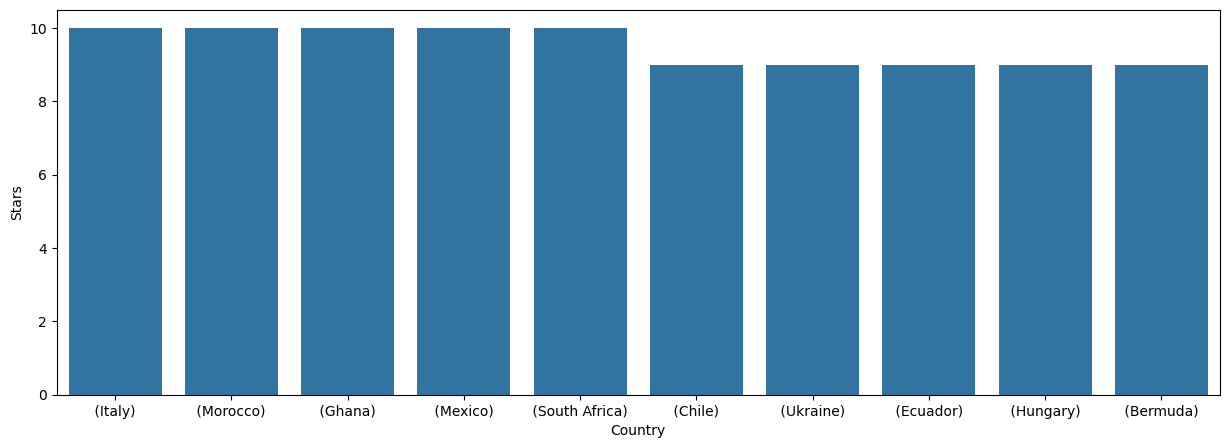

In [169]:

plt.figure(figsize=(15,5))
sns.barplot(x="Country",y="Stars",data=top_rated)
plt.savefig("BA_most_liked_in_countries.jpg")
plt.show()

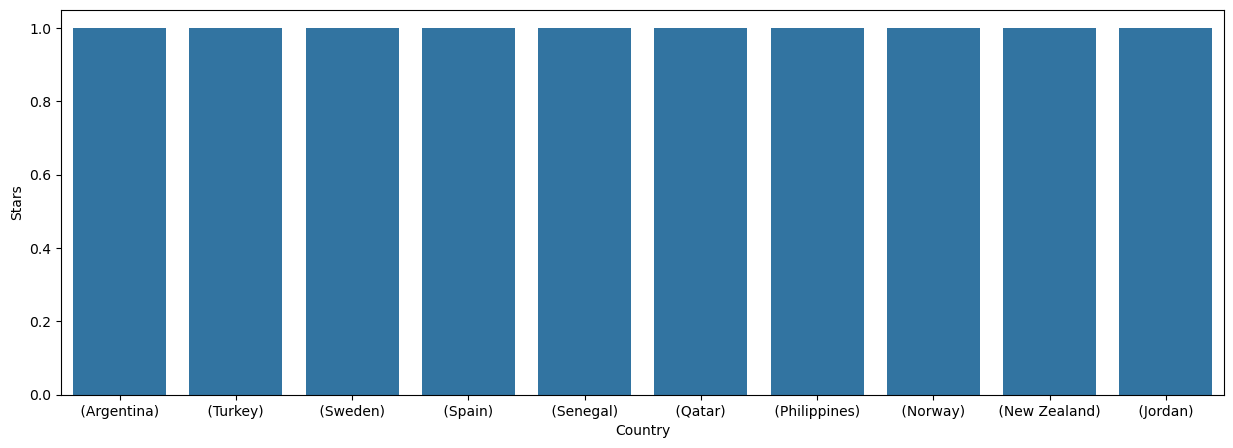

In [170]:
plt.figure(figsize=(15,5))
sns.barplot(x="Country",y="Stars",data=worst_rated)
plt.savefig("BA_least_liked_in_countries.jpg")
plt.show()